# ASC-ODE Team 06

|**Name**              |**ID**     |
|:---------------------|:---------:|
|Lorenz Friessenbichler|`e12102558`|
|Moritz Horina         |`e01529095`|
|Tinashe Chipako       |`e12533643`|
|Vladimir Toropov      |`e12451260`|

## Setup
### Recommendations
The Recommended way to run the project is via 
[VSCode](https://code.visualstudio.com/). 

### Dependencies
Follow this 
[instructions](https://code.visualstudio.com/docs/datascience/jupyter-notebooks)
for setting up the kernel and environment.

Run the following command to see if the setup was correct.

In [256]:
!which pip

/home/batman/repos/ASC-ODE-Team06/.venv/bin/pip


If the output showing that the `.venv/bin/pip` is in this directory then the 
setup was correct. If it is not or there is no output at all, then the setup
failed.

### Install

In [257]:
!git submodule update --init
%pip install \
    loguru \
    matplotlib \
    numpy \
    numpy \
    pandas \
    pybind11

Note: you may need to restart the kernel to use updated packages.


## Build
### Python Packages
This code block is importing all necessary python packages for this project.

In [258]:
from pathlib import Path
import subprocess
from shutil import rmtree
import pandas as pd
import matplotlib.pyplot as plt
from loguru import logger
import numpy as np

### Constants

In [259]:
# Enable debug mode
DEBUG = True
CWD = Path().cwd()
BUILD_DIR = "build"
RESULTS_DIR = "results"


build_dir = Path(CWD / BUILD_DIR)
results_dir = Path(CWD / RESULTS_DIR)

### Python utils
Utils method for this project

In [260]:
def execute_command(
    command: str,
    cwd: Path,
    timeout: int = 30,
) -> tuple[list[str], list[str]]:
    output = subprocess.run(
        args=command.split(),
        cwd=cwd,
        capture_output=True,
        check=False,
        timeout=timeout,
        encoding="utf-8",
    )
    stdout = output.stdout.splitlines()
    stderr = output.stderr.splitlines()

    logger.debug(f"Executed command {command.split()} in directory {cwd}")

    if stdout != []:
        logger.debug(f"stdout:{stdout}")
    if stderr != []:
        logger.error(f"stderr:{stderr}")

    return stdout, stderr


def rm_dir(dir: Path):
    try:
        rmtree(dir)
        logger.debug(f"Removed {dir.absolute()}")
    except (FileNotFoundError, OSError) as e:
        logger.error(f"Unable to remove {dir.absolute()} => {e}")

### Cmake
Build all binaries for this project

In [261]:
if DEBUG:
    rm_dir(build_dir)

build_dir.mkdir(parents=True, exist_ok=True)

2025-12-04 10:59:53.198 | DEBUG    | __main__:rm_dir:30 - Removed /home/batman/repos/ASC-ODE-Team06/build


In [262]:
logger.debug(f"Build directory is: {build_dir}")

execute_command(command="cmake ..", cwd=build_dir, timeout=60)
execute_command(command="make", cwd=build_dir, timeout=300)

2025-12-04 10:59:53.242 | DEBUG    | __main__:<module>:1 - Build directory is: /home/batman/repos/ASC-ODE-Team06/build
2025-12-04 10:59:56.444 | DEBUG    | __main__:execute_command:17 - Executed command ['cmake', '..'] in directory /home/batman/repos/ASC-ODE-Team06/build
2025-12-04 10:59:56.446 | DEBUG    | __main__:execute_command:20 - stdout:['-- The C compiler identification is GNU 13.3.0', '-- The CXX compiler identification is GNU 13.3.0', '-- Detecting C compiler ABI info', '-- Detecting C compiler ABI info - done', '-- Check for working C compiler: /usr/bin/cc - skipped', '-- Detecting C compile features', '-- Detecting C compile features - done', '-- Detecting CXX compiler ABI info', '-- Detecting CXX compiler ABI info - done', '-- Check for working CXX compiler: /usr/bin/c++ - skipped', '-- Detecting CXX compile features', '-- Detecting CXX compile features - done', '-- Found Python: /home/batman/repos/ASC-ODE-Team06/.venv/bin/python3.14 (found suitable version "3.14.0", minim

(['[  3%] \x1bBuilding CXX object CMakeFiles/test_ode.dir/demos/test_ode.cpp.o\x1b',
  '[  7%] \x1b\x1bLinking CXX executable bin/test_ode\x1b',
  '[  7%] Built target test_ode',
  '[ 11%] \x1bBuilding CXX object CMakeFiles/demo_autodiff.dir/demos/demo_autodiff.cpp.o\x1b',
  '[ 15%] \x1b\x1bLinking CXX executable bin/demo_autodiff\x1b',
  '[ 15%] Built target demo_autodiff',
  '[ 19%] \x1bBuilding CXX object CMakeFiles/massspring.dir/src/exercise17_massspring.cpp.o\x1b',
  '[ 23%] \x1b\x1bLinking CXX executable bin/massspring\x1b',
  '[ 23%] Built target massspring',
  '[ 26%] \x1bBuilding CXX object CMakeFiles/circuit.dir/src/exercise17_circuit.cpp.o\x1b',
  '[ 30%] \x1b\x1bLinking CXX executable bin/circuit\x1b',
  '[ 30%] Built target circuit',
  '[ 34%] \x1bBuilding CXX object CMakeFiles/legendre.dir/src/exercise18_legendre.cpp.o\x1b',
  '[ 38%] \x1b\x1bLinking CXX executable bin/legendre\x1b',
  '[ 38%] Built target legendre',
  '[ 42%] \x1bBuilding CXX object CMakeFiles/pendulum.

## Run Tests

In [263]:
if DEBUG:
    rm_dir(results_dir)

results_dir.mkdir(parents=True, exist_ok=True)

exe17_dir = Path(results_dir / "exercise17")
exe18_dir = Path(results_dir / "exercise18")
exe19_dir = Path(results_dir / "exercise19")


for dir in (exe17_dir, exe18_dir, exe19_dir):
    Path(dir / "data").mkdir(parents=True, exist_ok=True)
    Path(dir / "plot").mkdir(parents=True, exist_ok=True)

2025-12-04 11:01:11.655 | DEBUG    | __main__:rm_dir:30 - Removed /home/batman/repos/ASC-ODE-Team06/results


### Exercise 17
#### Create Data

In [264]:
execute_command(
    f"{build_dir.absolute()}/bin/circuit {Path(exe17_dir / 'data').absolute()}",
    cwd=CWD,
)
execute_command(
    f"{build_dir.absolute()}/bin/massspring {Path(exe17_dir / 'data').absolute()}",
    cwd=CWD,
)

2025-12-04 11:01:11.738 | DEBUG    | __main__:execute_command:17 - Executed command ['/home/batman/repos/ASC-ODE-Team06/build/bin/circuit', '/home/batman/repos/ASC-ODE-Team06/results/exercise17/data'] in directory /home/batman/repos/ASC-ODE-Team06
2025-12-04 11:01:11.782 | DEBUG    | __main__:execute_command:17 - Executed command ['/home/batman/repos/ASC-ODE-Team06/build/bin/massspring', '/home/batman/repos/ASC-ODE-Team06/results/exercise17/data'] in directory /home/batman/repos/ASC-ODE-Team06


([], [])

#### Create Plots

### Exercise 18
#### Create Data

In [265]:
execute_command(
    f"{build_dir.absolute()}/bin/legendre {Path(exe18_dir / 'data').absolute()}",
    cwd=CWD,
)
execute_command(
    f"{build_dir.absolute()}/bin/pendulum {Path(exe18_dir / 'data').absolute()}",
    cwd=CWD,
)

2025-12-04 11:01:11.831 | DEBUG    | __main__:execute_command:17 - Executed command ['/home/batman/repos/ASC-ODE-Team06/build/bin/legendre', '/home/batman/repos/ASC-ODE-Team06/results/exercise18/data'] in directory /home/batman/repos/ASC-ODE-Team06
2025-12-04 11:01:11.839 | DEBUG    | __main__:execute_command:17 - Executed command ['/home/batman/repos/ASC-ODE-Team06/build/bin/pendulum', '/home/batman/repos/ASC-ODE-Team06/results/exercise18/data'] in directory /home/batman/repos/ASC-ODE-Team06


([], [])

#### Create Plots

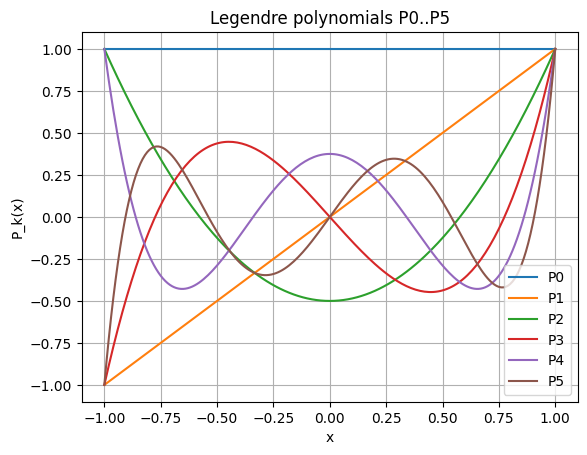

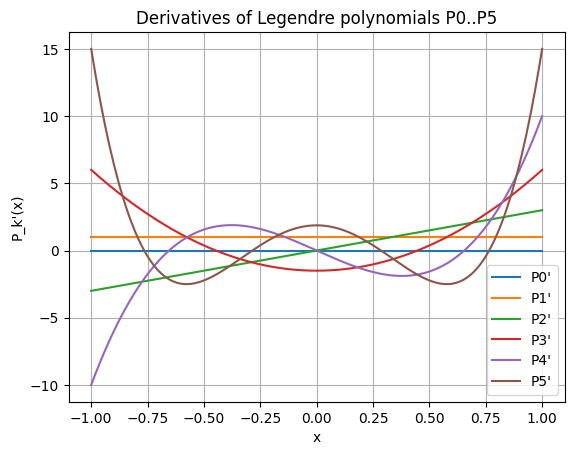

In [266]:
data = np.loadtxt(Path(exe18_dir / "data/legendre.tsv").absolute())

x = data[:, 0]

# unpack P_k and P_k' (for k = 0..5)
P0, dP0 = data[:, 1], data[:, 2]
P1, dP1 = data[:, 3], data[:, 4]
P2, dP2 = data[:, 5], data[:, 6]
P3, dP3 = data[:, 7], data[:, 8]
P4, dP4 = data[:, 9], data[:, 10]
P5, dP5 = data[:, 11], data[:, 12]

# ---- plot the polynomials P_k ----
plt.figure()
plt.plot(x, P0, label="P0")
plt.plot(x, P1, label="P1")
plt.plot(x, P2, label="P2")
plt.plot(x, P3, label="P3")
plt.plot(x, P4, label="P4")
plt.plot(x, P5, label="P5")
plt.xlabel("x")
plt.ylabel("P_k(x)")
plt.title("Legendre polynomials P0..P5")
plt.grid()
plt.legend()
plt.savefig(Path(exe18_dir / "plot/legendre_polynomials.png"))

# ---- plot the derivatives P_k' ----
plt.figure()
plt.plot(x, dP0, label="P0'")
plt.plot(x, dP1, label="P1'")
plt.plot(x, dP2, label="P2'")
plt.plot(x, dP3, label="P3'")
plt.plot(x, dP4, label="P4'")
plt.plot(x, dP5, label="P5'")
plt.xlabel("x")
plt.ylabel("P_k'(x)")
plt.title("Derivatives of Legendre polynomials P0..P5")
plt.grid()
plt.legend()
plt.savefig(Path(exe18_dir / "plot/legendre_derivatives_polynomials.png"))

### Exercise 19
#### Create Data

In [267]:
execute_command(
    f"{build_dir.absolute()}/bin/runge_kutta {Path(exe19_dir / 'data').absolute()}",
    cwd=CWD,
)

2025-12-04 11:01:13.122 | DEBUG    | __main__:execute_command:17 - Executed command ['/home/batman/repos/ASC-ODE-Team06/build/bin/runge_kutta', '/home/batman/repos/ASC-ODE-Team06/results/exercise19/data'] in directory /home/batman/repos/ASC-ODE-Team06


([], [])

#### Create Plots

## Report
### Exercise 17

### Exercise 18
![legendre_derivatives_polynomials](./results/exercise18/plot/legendre_derivatives_polynomials.png)
![legendre_polynomials](./results/exercise18/plot/legendre_polynomials.png)

### Exercise 19
